In [1]:
import os

In [2]:
os.chdir(r"C:\Users\admin\Downloads\18")

In [3]:
pip install TensorFlow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow
import tensorflow.keras

In [5]:
from keras.preprocessing import image
path2 = r"C:\Users\admin\Downloads\18\TestDataset\N_1.jpg"
test_image = image.load_img(path2, target_size=(128, 128))

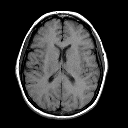

In [6]:
test_image

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [8]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
TrainingDataset = r"C:\Users\admin\Downloads\18\TrainingDataset"

In [10]:

train_datagen = ImageDataGenerator(rescale=None,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


In [11]:
training_set = train_datagen.flow_from_directory(TrainingDataset,
                                                 target_size=(128, 128),
                                                 batch_size=8,
                                                 class_mode='categorical')

Found 30 images belonging to 3 classes.


In [18]:
history = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=15)



Epoch 1/15


C:\Users\admin\AppData\Local\Temp\ipykernel_3136\3967782700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=15)


4/4 [==============================] - 1s 280ms/step - loss: 0.4082 - accuracy: 0.8333
Epoch 2/15
4/4 [==============================] - 1s 290ms/step - loss: 0.1663 - accuracy: 0.9667
Epoch 3/15
4/4 [==============================] - 1s 278ms/step - loss: 0.1588 - accuracy: 0.9000
Epoch 4/15
4/4 [==============================] - 1s 260ms/step - loss: 0.2245 - accuracy: 0.9333
Epoch 5/15
4/4 [==============================] - 1s 269ms/step - loss: 0.1823 - accuracy: 0.9333
Epoch 6/15
4/4 [==============================] - 1s 271ms/step - loss: 0.1971 - accuracy: 0.8667
Epoch 7/15
4/4 [==============================] - 1s 260ms/step - loss: 0.2395 - accuracy: 0.9000
Epoch 8/15
4/4 [==============================] - 1s 309ms/step - loss: 0.1125 - accuracy: 0.9667
Epoch 9/15
4/4 [==============================] - 1s 271ms/step - loss: 0.3083 - accuracy: 0.8667
Epoch 10/15
4/4 [==============================] - 1s 281ms/step - loss: 0.1612 - accuracy: 0.9667
Epoch 11/15
4/4 [=============

In [22]:


model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("model.h1")
    print("Saved model to disk")

Saved model to disk


In [23]:
TestDataset = r'C:\Users\admin\Downloads\18\TestDataset'

In [29]:
from keras.preprocessing import image
from keras.models import model_from_json
import numpy as np

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h1")

print("Loaded model from disk")
label = ["Benign", "Malign", "Normal"]
path3 = r"C:\Users\admin\Downloads\18\TestDataset\B_5.jpg"
test_image = image.load_img(path3, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = loaded_model.predict(test_image)
label2 = label[result.argmax()]
print(label2)

Loaded model from disk
1/1 [==============================] - 0s 166ms/step
Benign
